In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
procurement = pd.read_csv('data_2/procurement.csv')

In [3]:
procurement.dropna(subset=['date_of_contract_close', 'date_of_publication'], inplace=True)

In [4]:
procurement["bids_submission_deadline"] = pd.to_datetime(procurement["bids_submission_deadline"], format='%Y-%m-%d', errors = 'coerce')
procurement["date_of_contract_close"] = pd.to_datetime(procurement["date_of_contract_close"], format='%Y-%m-%d', errors = 'coerce')
procurement["date_of_publication"] = pd.to_datetime(procurement["date_of_publication"], format='%Y-%m-%d', errors = 'coerce')

In [5]:
#procurement.dropna(subset=['date_of_contract_close', 'date_of_publication'], inplace=True)
#procurement.dropna(subset=['bids_submission_deadline', 'date_of_publication'], inplace=True)

In [6]:
procurement.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30130 entries, 0 to 31552
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   id                                  30130 non-null  int64         
 1   bids_submission_deadline            15438 non-null  datetime64[ns]
 2   code_from_nipez_codelist            28540 non-null  object        
 3   contract_price                      30130 non-null  float64       
 4   contract_price_vat                  30130 non-null  float64       
 5   contract_price_with_amendments      30130 non-null  float64       
 6   contract_price_with_amendments_vat  30130 non-null  float64       
 7   date_of_contract_close              30129 non-null  datetime64[ns]
 8   date_of_publication                 30130 non-null  datetime64[ns]
 9   is_association_of_suppliers         30123 non-null  object        
 10  procurement_name           

In [7]:
procurement['publication_close_interval'] = (procurement['date_of_contract_close'] - procurement['date_of_publication']).dt.days
procurement['bids_close_interval'] = (procurement['bids_submission_deadline'] - procurement['date_of_publication']).dt.days

In [8]:
procurement

,id,bids_submission_deadline,code_from_nipez_codelist,contract_price,contract_price_vat,contract_price_with_amendments,contract_price_with_amendments_vat,date_of_contract_close,date_of_publication,is_association_of_suppliers,...,place_of_performance,public_contract_regime,system_number,type,type_of_procedure,contact_person_id,contracting_authority_id,supplier_id,publication_close_interval,bids_close_interval
0,1,NaT,15710000-8,38973.48,44820.00,38973.48,44820.00,2022-03-02,2022-03-02,False,...,Liberecký kraj,NaN,N006/22/V00004456,Public contract for deliveries,Zadávání VZ na základě rámcové dohody bez obno...,1,1,1,0.0,NaN
1,2,NaT,50110000-9,9832.02,11896.74,9832.02,11896.74,2023-11-23,2023-11-30,False,...,Jihočeský kraj,NaN,N006/23/V00033550,Public contract for services,Zadávání VZ na základě rámcové dohody bez obno...,2,1,2,-7.0,NaN
2,3,NaT,NaN,130000.00,130000.00,130000.00,130000.00,2022-02-24,2022-03-02,False,...,NaN,Small-scale public contract,N006/22/V00004676,Public contract for deliveries,Otevřená výzva,1,1,3,-6.0,NaN
3,4,NaT,90511000-2,26580.00,32161.80,26580.00,32161.80,2022-03-07,2022-03-07,False,...,Liberecký kraj,NaN,N006/22/V00004924,Public contract for services,Zadávání VZ na základě rámcové dohody bez obno...,1,1,4,0.0,NaN
4,5,NaT,90500000-2,8468.00,9314.80,8468.00,9314.80,2023-10-24,2023-10-24,False,...,Středočeský kraj,NaN,N006/23/V00030140,Public contract for services,Zadávání VZ na základě rámcové dohody bez obno...,3,1,5,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31548,31623,NaT,90500000-2,0.00,0.00,0.00,0.00,2020-06-24,2021-03-22,False,...,Hlavní město Praha,Small-scale public contract,N006/21/V00006509,Public contract for services,Uzavřená výzva,3174,420,1162,-271.0,NaN
31549,31624,NaT,30121100-4,0.00,0.00,0.00,0.00,2021-06-10,2021-06-20,False,...,Hlavní město Praha,Small-scale public contract,N006/21/V00015961,Public contract for deliveries,Uzavřená výzva,3174,420,585,-10.0,NaN
31550,31625,NaT,09123000-7,0.00,0.00,0.00,0.00,2020-07-03,2020-07-30,False,...,Česká republika,Above-limit public contract,N006/20/V00019093,Public contract for deliveries,Jednací řízení bez uveřejnění,1559,179,874,-27.0,NaN
31551,31626,2023-03-01,50100000-6,141855.33,171644.95,141855.33,171644.95,2023-03-14,2023-02-15,False,...,Jihozápad,Small-scale public contract,N006/23/V00002968,Public contract for services,Otevřená výzva,897,1,12336,27.0,14.0


In [9]:
procurement['publication_close_interval'].describe()

count    30129.000000
mean        -0.842444
std        195.248757
min      -7642.000000
25%         -4.000000
50%          9.000000
75%         39.000000
max       1491.000000
Name: publication_close_interval, dtype: float64

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 4.0000e+00, 0.0000e+00, 3.0000e+00,
        0.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        4.0000e+00, 2.0000e+00, 0.0000e+00, 4.0000e+00, 5.0000e+00,
        1.4000e+01, 9.0000e+00, 1.2000e+01, 4.4000e+01, 4.1000e+01,
        5.0000e+01, 4.0000e+01, 7.8000e+01, 8.9000e+01, 1.5600e+02,
        5.8200e+02, 1.9259e+04, 9.3390e+03, 3.3000e+02, 3.7000e+01,
        7.0000e+00, 8.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([-7642.  , -7459.34, -7276.68, -7094.02, -6911.36, -6728.7 ,
        -6546.04, -6363.38, -6180.72, -5998.06, -5815.4 , -5632.74,
        -5450.08, -5267.42, -5084.76, -4902.1 , -4719.44, -4536.78,
        -4354.12, -4171.46, -3988.8 , -3806.14, -3623.48, -3440.82,
        -3258.16, -3075.5 , -2892.84, -2710.18

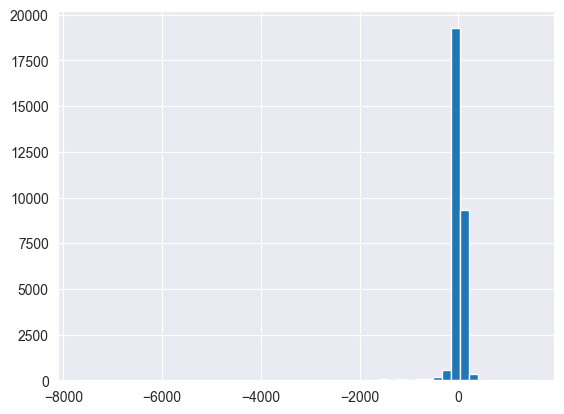

In [10]:
plt.hist(procurement['publication_close_interval'], bins=50)

In [11]:
procurement['bids_close_interval'].describe()

count    15438.000000
mean        19.682990
std         30.347115
min      -1421.000000
25%         10.000000
50%         14.000000
75%         23.750000
max        968.000000
Name: bids_close_interval, dtype: float64

(array([0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 3.000e+00, 1.000e+00,
        2.000e+00, 5.000e+00, 7.000e+00, 4.000e+00, 4.000e+00, 9.000e+00,
        1.200e+01, 7.000e+00, 1.200e+01, 2.500e+01, 3.200e+01, 1.020e+02,
        2.690e+02, 1.080e+02, 2.240e+02, 4.887e+03, 3.228e+03, 1.501e+03,
        1.107e+03, 4.910e+02, 1.149e+03, 7.410e+02, 2.930e+02, 2.240e+02,
        1.100e+02, 9.700e+01, 7.300e+01, 9.600e+01, 7.700e+01, 4.600e+01,
        5.600e+01, 3.500e+01, 2.900e+01, 3.000e+01, 3.200e+01, 3.300e+01,
        1.700e+01, 1.800e+01]),
 array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
         -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
         -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
           8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
          44.,   48.,   52.,   56.,   60.,   64.,   68.,   72.,   76.,
          80.,   84.,

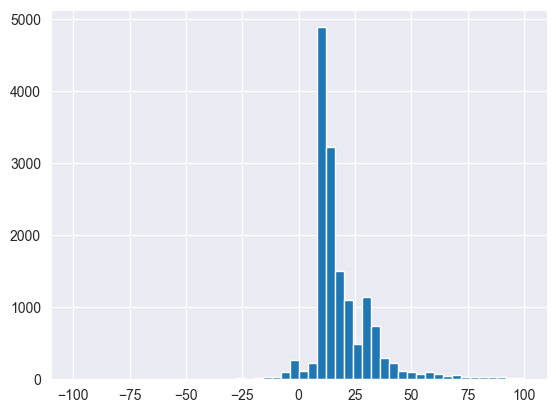

In [12]:
plt.hist(procurement['bids_close_interval'], bins=50, range=(-100, 100))

In [13]:
import seaborn as sns
import numpy as np

In [14]:
# get number of outliers in column 'contract_price' based on IQR method, and print the percentage of outliers
Q1 = procurement['bids_close_interval'].quantile(0.25)
Q3 = procurement['bids_close_interval'].quantile(0.75)
IQR = Q3 - Q1
outliers = procurement[(procurement['bids_close_interval'] < (Q1 - 1.5 * IQR)) | (procurement['bids_close_interval'] > (Q3 + 1.5 * IQR))]
print(f'Number of outliers: {outliers.shape[0]}')
print(f'Percentage of outliers: {outliers.shape[0] / procurement.shape[0] * 100}%')
data_without_outliers_bids = procurement[~procurement.index.isin(outliers.index)]

Number of outliers: 1078
Percentage of outliers: 3.5778294059077327%


In [15]:
# get number of outliers in column 'contract_price' based on IQR method, and print the percentage of outliers
Q1 = procurement['publication_close_interval'].quantile(0.25)
Q3 = procurement['publication_close_interval'].quantile(0.75)
IQR = Q3 - Q1
outliers = procurement[(procurement['publication_close_interval'] < (Q1 - 1.5 * IQR)) | (procurement['publication_close_interval'] > (Q3 + 1.5 * IQR))]
print(f'Number of outliers: {outliers.shape[0]}')
print(f'Percentage of outliers: {outliers.shape[0] / procurement.shape[0] * 100}%')
data_without_outliers_pub = procurement[~procurement.index.isin(outliers.index)]

Number of outliers: 3920
Percentage of outliers: 13.010288748755395%


C:\Users\marti\PycharmProjects\bakalarka\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


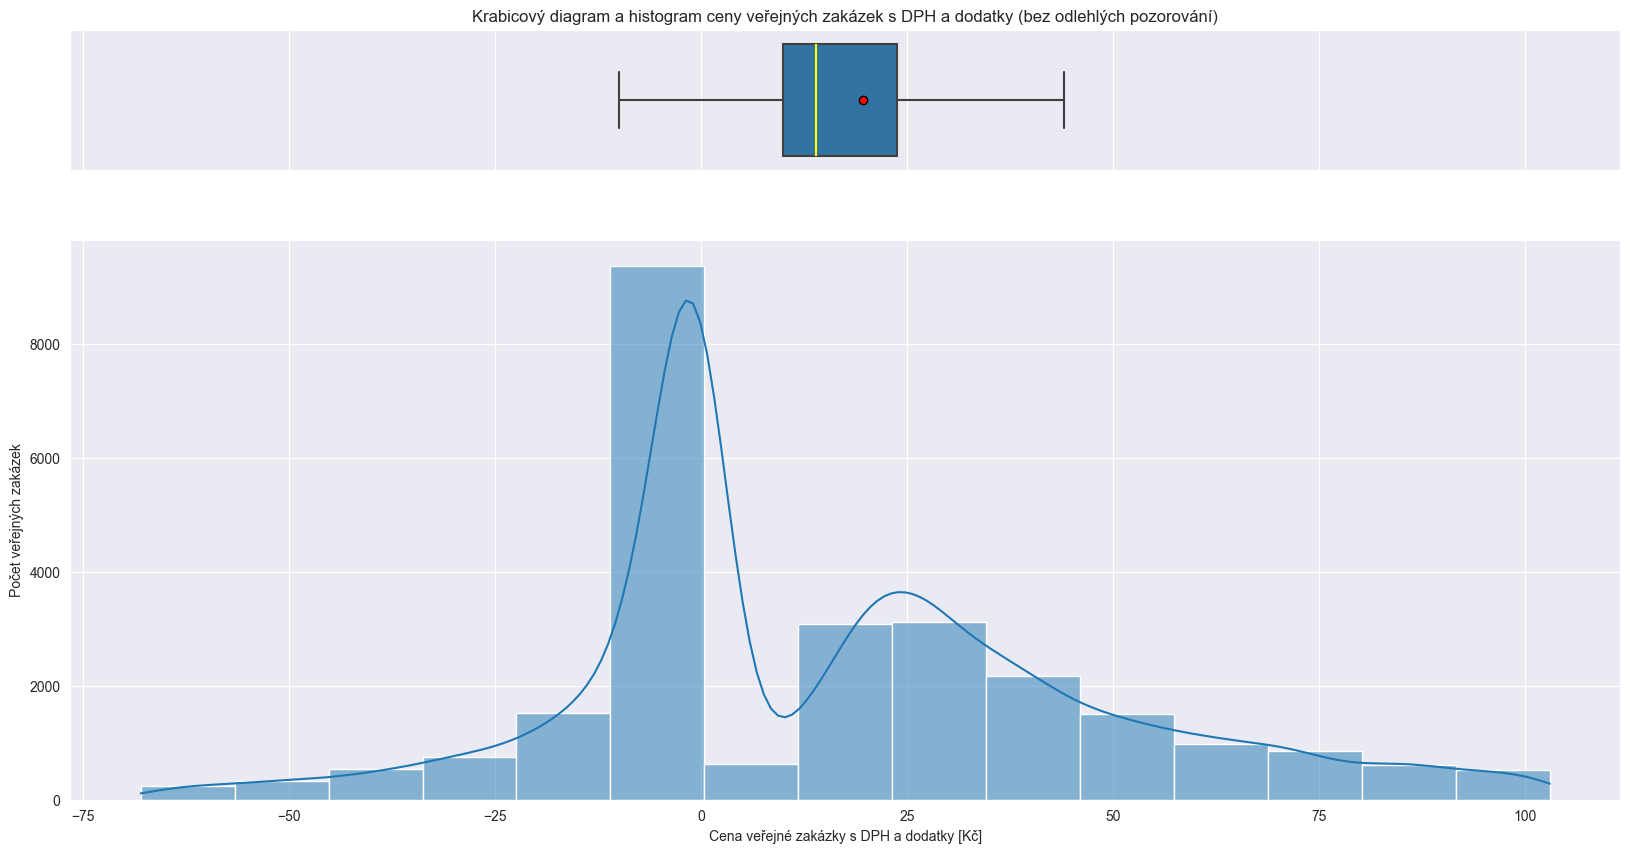

In [16]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2, .8)}, figsize=(20, 10))
 
# Box plot
sns.boxplot(ax=ax_box,data=procurement, x='bids_close_interval', showfliers=False, showmeans=True, meanprops=dict(marker='o', markerfacecolor='red', markeredgecolor='black'), medianprops=dict(color='yellow'))
ax_box.set(xlabel='')
ax_hist.set_xlabel('Cena veřejné zakázky s DPH a dodatky [Kč]')
ax_hist.set_ylabel('Počet veřejných zakázek')
ax_box.set_title('Krabicový diagram a histogram ceny veřejných zakázek s DPH a dodatky (bez odlehlých pozorování)')

# Histogram
sns.histplot(ax=ax_hist, data=data_without_outliers_bids, label='bids_close_interval', x='bids_close_interval', bins=int(1 + np.log2(data_without_outliers_bids.shape[0])), kde=True)


C:\Users\marti\PycharmProjects\bakalarka\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marti\PycharmProjects\bakalarka\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


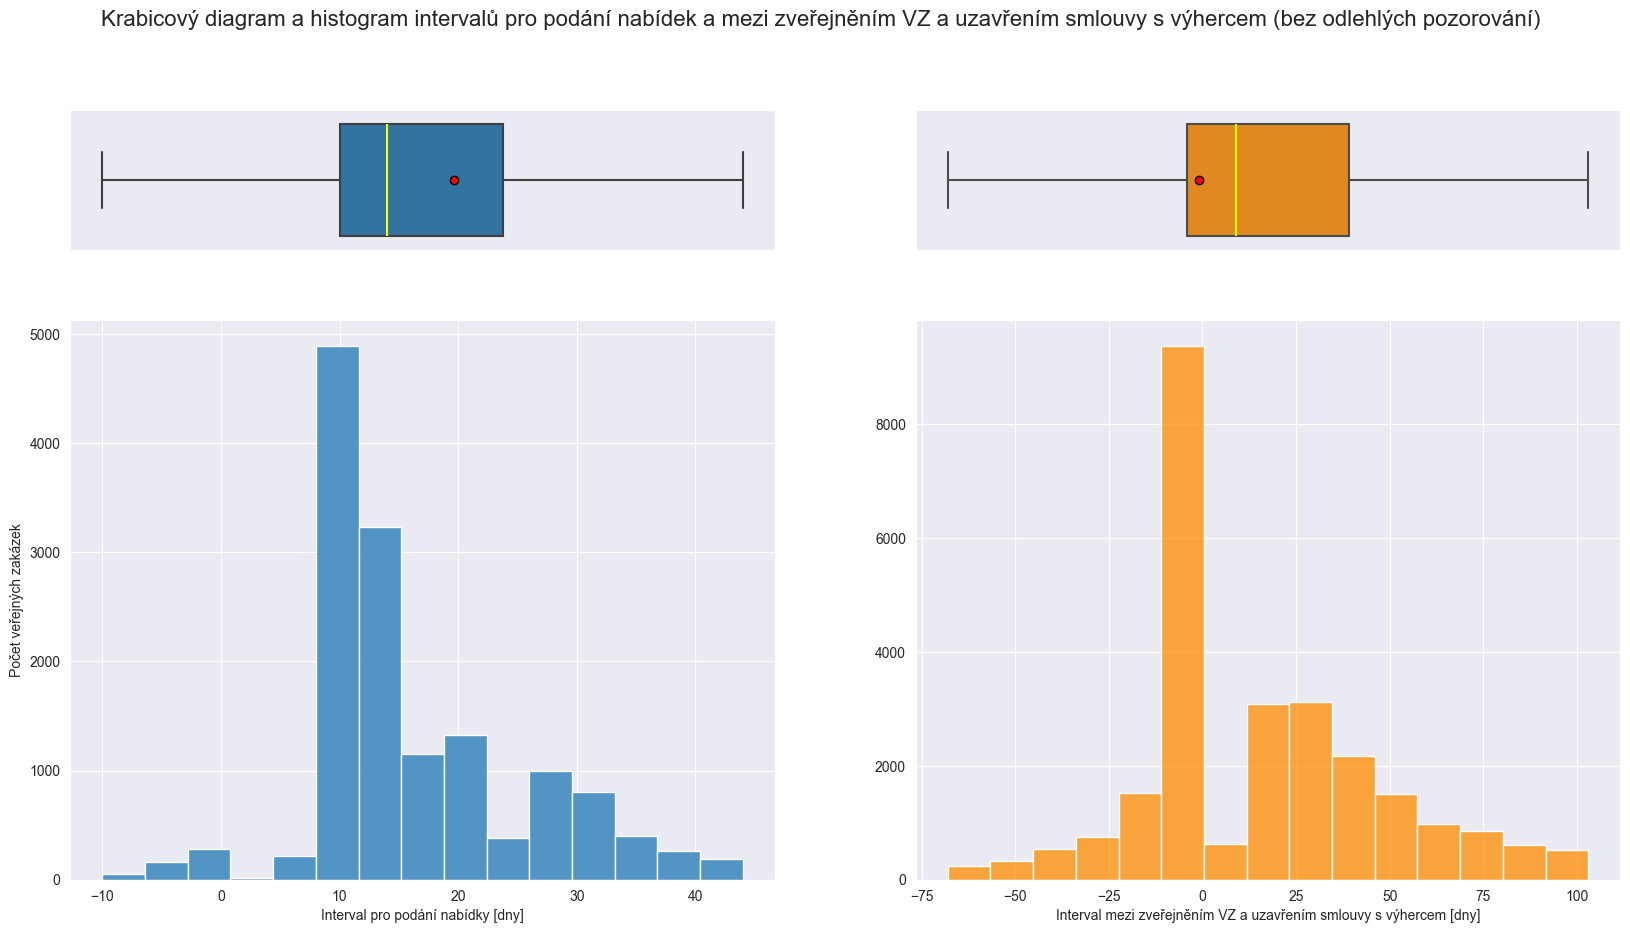

In [47]:
fig, axs = plt.subplots(2, 2, sharex=False, gridspec_kw={"height_ratios": (.2, .8)}, figsize=(20, 10))
 
# Box plot
sns.boxplot(ax=axs[0, 0],data=procurement, x='bids_close_interval', showfliers=False, showmeans=True, meanprops=dict(marker='o', markerfacecolor='red', markeredgecolor='black'), medianprops=dict(color='yellow'))
sns.boxplot(ax=axs[0, 1],data=procurement, x='publication_close_interval', showfliers=False, showmeans=True, meanprops=dict(marker='o', markerfacecolor='red', markeredgecolor='black'), medianprops=dict(color='yellow'), color='darkorange')
sns.histplot(ax=axs[1, 0], data=data_without_outliers_bids, label='bids_close_interval', x='bids_close_interval', bins=int(1 + np.log2(data_without_outliers_bids.shape[0])))
sns.histplot(ax=axs[1, 1], data=data_without_outliers_pub, label='publication_close_interval', x='publication_close_interval', bins=int(1 + np.log2(data_without_outliers_pub.shape[0])), color='darkorange')
axs[0, 0].set(xlabel='')
axs[0, 1].set(xlabel='')
axs[1, 0].set_xlabel('Interval pro podání nabídky [dny]')
axs[1, 1].set_xlabel('Interval mezi zveřejněním VZ a uzavřením smlouvy s výhercem [dny]')
axs[1, 0].set_ylabel('Počet veřejných zakázek')
fig.suptitle('Krabicový diagram a histogram intervalů pro podání nabídek a mezi zveřejněním VZ a uzavřením smlouvy s výhercem (bez odlehlých pozorování)', size=16)
axs[0, 0].sharex(axs[1, 0])
axs[0, 1].sharex(axs[1, 1])
axs[0, 0].xaxis.set_visible(False)
axs[0, 1].xaxis.set_visible(False)
axs[1, 1].set(ylabel='')
plt.show()

In [45]:
procurement['publication_close_interval'].describe()

count    30129.000000
mean        -0.842444
std        195.248757
min      -7642.000000
25%         -4.000000
50%          9.000000
75%         39.000000
max       1491.000000
Name: publication_close_interval, dtype: float64

In [46]:
procurement['bids_close_interval'].describe()

count    15438.000000
mean        19.682990
std         30.347115
min      -1421.000000
25%         10.000000
50%         14.000000
75%         23.750000
max        968.000000
Name: bids_close_interval, dtype: float64

In [48]:
# percentage of publication_close_interval values that are negative
procurement[procurement['publication_close_interval'] < 0].shape[0] / procurement.shape[0] * 100

38.081646199800865

In [50]:
procurement[procurement['publication_close_interval'] < 0]['type_of_procedure'].value_counts()

type_of_procedure
Zadávání VZ na základě rámcové dohody bez obnovení soutěže (mimo zadávací řízení)          3051
Přímé zadání                                                                               1992
Uzavřená výzva                                                                             1732
Zadávání VZ na základě rámcové dohody bez obnovení soutěže na základě zadávacího řízení    1193
Zadávání VZ na základě rámcové dohody s obnovením soutěže na základě zadávacího řízení     1096
Zadávání VZ v DNS                                                                           927
Zadávání VZ na základě rámcové dohody s obnovením soutěže (mimo zadávací řízení)            449
Jednací řízení bez uveřejnění                                                               373
Otevřená výzva                                                                              223
Zadávání VZ na základě RS s jedním uchazečem (mimo režim ZVZ)                               189
Zadávání VZ na základě

In [59]:
procurement[(procurement['publication_close_interval'] < 0) & (procurement['type_of_procedure'] == 'Otevřené řízení')].sort_values(by='contract_price_with_amendments_vat', ascending=False)

,id,bids_submission_deadline,code_from_nipez_codelist,contract_price,contract_price_vat,contract_price_with_amendments,contract_price_with_amendments_vat,date_of_contract_close,date_of_publication,is_association_of_suppliers,...,place_of_performance,public_contract_regime,system_number,type,type_of_procedure,contact_person_id,contracting_authority_id,supplier_id,publication_close_interval,bids_close_interval
31329,31403,NaT,NaN,2.796058e+09,3.075664e+09,2.796058e+09,3.075664e+09,2021-11-19,2023-03-16,False,...,NaN,NaN,N006/23/V00007207,Public contract for deliveries,Otevřené řízení,1892,155,1379,-482.0,NaN
31340,31414,NaT,NaN,4.674732e+08,5.656426e+08,4.674732e+08,5.656426e+08,2021-10-20,2022-03-16,False,...,NaN,NaN,N006/22/V00005964,Public contract for services,Otevřené řízení,1412,155,1379,-147.0,NaN
9041,13995,NaT,NaN,9.917355e+07,1.200000e+08,9.917355e+07,1.200000e+08,2018-05-24,2019-09-23,False,...,NaN,NaN,N006/19/V00027242,Public contract for deliveries,Otevřené řízení,1645,1,7597,-487.0,NaN
27320,27354,NaT,44520000-1,2.319397e+07,2.806470e+07,2.319397e+07,2.806470e+07,2019-08-21,2023-04-24,False,...,NaN,Above-limit public contract,N006/23/V00011308,Public contract for deliveries,Otevřené řízení,2951,1278,11131,-1342.0,NaN
31339,31413,NaT,NaN,2.047173e+07,2.477080e+07,2.047173e+07,2.477080e+07,2021-08-06,2022-03-16,False,...,NaN,NaN,N006/22/V00005954,Public contract for services,Otevřené řízení,1412,155,1379,-222.0,NaN
21702,21675,NaT,NaN,1.782328e+07,2.049677e+07,1.782328e+07,2.049677e+07,2022-01-12,2022-01-17,False,...,NaN,Above-limit public contract,N006/22/V00000908,Public contract for services,Otevřené řízení,1427,1060,9582,-5.0,NaN
21701,21674,NaT,NaN,1.782328e+07,2.049677e+07,1.782328e+07,2.049677e+07,2022-01-12,2022-01-17,False,...,NaN,Above-limit public contract,N006/22/V00000908,Public contract for services,Otevřené řízení,1427,1060,5756,-5.0,NaN
445,472,NaT,72000000-5,1.614300e+07,1.953303e+07,1.614300e+07,1.953303e+07,2023-10-25,2023-11-29,False,...,Česká republika,NaN,N006/23/V00023568,Public contract for services,Otevřené řízení,205,110,557,-35.0,NaN
21190,21168,NaT,NaN,1.658870e+07,1.907700e+07,1.658870e+07,1.907700e+07,2022-01-13,2023-07-13,False,...,NaN,Above-limit public contract,N006/23/V00019842,Public contract for services,Otevřené řízení,115,85,9582,-546.0,NaN
21189,21167,NaT,NaN,1.658870e+07,1.907700e+07,1.658870e+07,1.907700e+07,2022-01-13,2023-07-13,False,...,NaN,Above-limit public contract,N006/23/V00019842,Public contract for services,Otevřené řízení,115,85,1468,-546.0,NaN
